In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aamazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
df = df[['product_id', 'product_name', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count', 'user_id', 'category']]
df.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'user_id', 'category'],
      dtype='object')

# Data Cleaning & Preparation

In [4]:

# Split the 'category' into separate columns
for i in range(1, 4):
    column_name = f'subcategory_{i}'
    df[column_name] = df['category'].str.split("|").str[-i]

df.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'user_id', 'category',
       'subcategory_1', 'subcategory_2', 'subcategory_3'],
      dtype='object')

In [5]:

df['discounted_price'] = df['discounted_price'].apply(lambda x: x.replace('₹',''))
df['actual_price'] = df['actual_price'].apply(lambda x: x.replace('₹',''))
df['discount_percentage'] = df['discount_percentage'].apply(lambda x: x.replace('%',''))
df = df.drop('category', axis=1)

# renaming specific columns
df = df.rename(columns={'subcategory_1': 'category', 'subcategory_2':'subcategory','subcategory_3' :'subcategory_1'})



df.columns


Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'user_id', 'category',
       'subcategory', 'subcategory_1'],
      dtype='object')

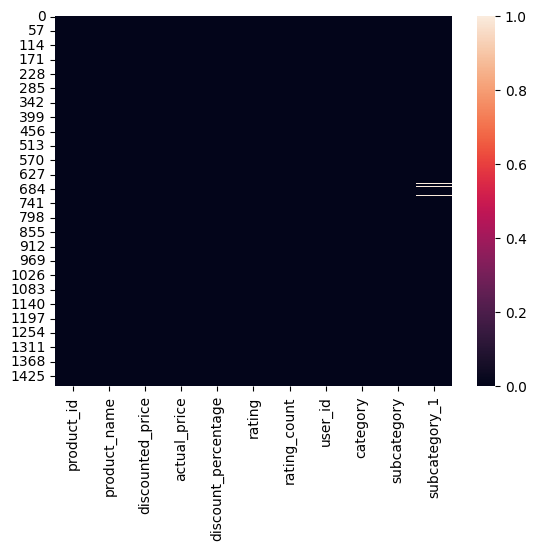

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.isna().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
user_id                0
category               0
subcategory            0
subcategory_1          8
dtype: int64

In [8]:
df.isna().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
user_id                0
category               0
subcategory            0
subcategory_1          8
dtype: int64

In [9]:
df =df.dropna()
df.isna().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
user_id                0
category               0
subcategory            0
subcategory_1          0
dtype: int64

In [10]:
df.dtypes
        

product_id             object
product_name           object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
user_id                object
category               object
subcategory            object
subcategory_1          object
dtype: object

In [11]:
def replace_comma(df,columns):
    for col in columns:
        df[col] = df[col].str.replace(',','')
    
columns = ['actual_price', 'rating','rating_count', 'discounted_price']
replace_comma(df,columns)

In [12]:
def change_type(df,columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = np.round(df[col].fillna(0)).astype('Int64')
columns  = ['actual_price','rating_count', 'discounted_price','discount_percentage']
change_type(df, columns)

In [13]:
df['discount_percentage'] = df['discount_percentage'] / 100

df['rating'] = df['rating'].str.replace('|','0')
df['rating'] = df['rating'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1455 non-null   object 
 1   product_name         1455 non-null   object 
 2   discounted_price     1455 non-null   Int64  
 3   actual_price         1455 non-null   Int64  
 4   discount_percentage  1455 non-null   Float64
 5   rating               1455 non-null   float64
 6   rating_count         1455 non-null   Int64  
 7   user_id              1455 non-null   object 
 8   category             1455 non-null   object 
 9   subcategory          1455 non-null   object 
 10  subcategory_1        1455 non-null   object 
dtypes: Float64(1), Int64(3), float64(1), object(6)
memory usage: 142.1+ KB


# Data Exploration & Visualization

In [14]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,category,subcategory,subcategory_1
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,1099,0.64,4.2,24269,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",USBCables,Cables,Cables&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349,0.43,4.0,43994,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",USBCables,Cables,Cables&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,1899,0.9,3.9,7928,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",USBCables,Cables,Cables&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699,0.53,4.2,94363,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",USBCables,Cables,Cables&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399,0.61,4.2,16905,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",USBCables,Cables,Cables&Accessories


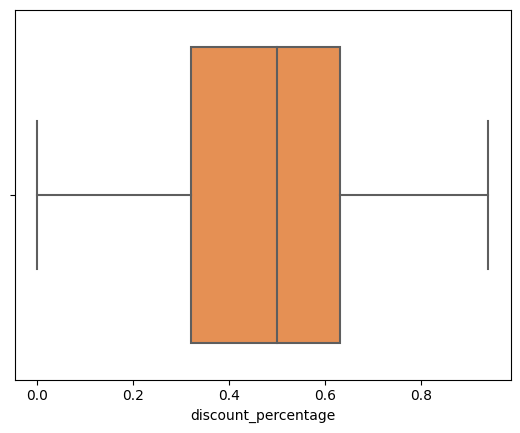

In [15]:
sns.boxplot(df, x='discount_percentage',palette = 'Oranges');

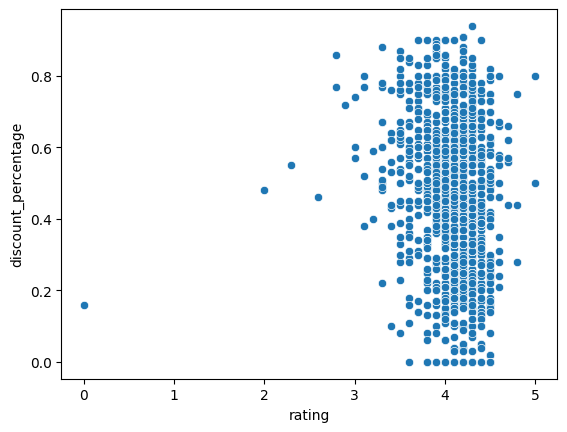

In [16]:
sns.scatterplot(df,x='rating', y='discount_percentage')
plt.show()

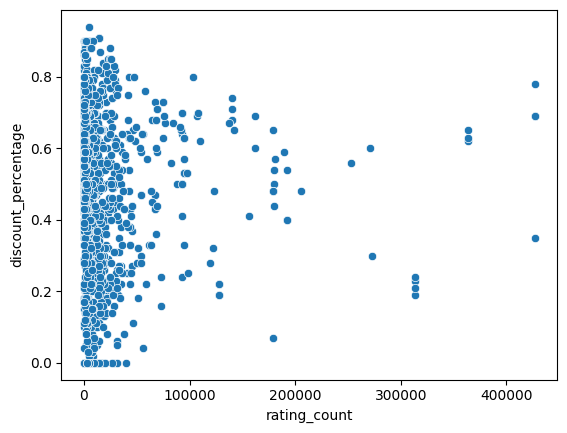

In [17]:
sns.scatterplot(df,x='rating_count', y='discount_percentage')
plt.show()

In [18]:
df.groupby(['category','subcategory'])['rating_count'].sum().sort_values(ascending=False).head(5)

category      subcategory             
In-Ear        Headphones                  4204939
USBCables     Cables                      3547816
Smartphones   Smartphones&BasicMobiles    2493269
HDMICables    Cables                      1906054
SmartWatches  WearableTechnology          1644476
Name: rating_count, dtype: Int64

In [19]:
df.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'user_id', 'category',
       'subcategory', 'subcategory_1'],
      dtype='object')

In [20]:
df.groupby('category')['discount_percentage'].mean().nlargest(10)

category
CableConnectionProtectors         0.9
Earpads                           0.9
PhoneCharms                       0.9
DustCovers                      0.875
Shower&WallMounts                0.82
Adapters                     0.803333
InternalHardDrives                0.8
USBtoUSBAdapters                0.785
Stands                       0.758182
NotebookComputerStands       0.756667
Name: discount_percentage, dtype: Float64

In [21]:
df.groupby('subcategory')['discounted_price'].sum().nlargest(10)

subcategory
Televisions                   1608017
Smartphones&BasicMobiles      1086799
SmallKitchenAppliances         248273
WearableTechnology             177817
WaterHeaters&Geysers           137634
Vacuums                        124616
Cables                          98043
RoomHeaters                     97371
WaterPurifiers&Accessories      91067
Headphones                      62118
Name: discounted_price, dtype: Int64

In [22]:
df.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'user_id', 'category',
       'subcategory', 'subcategory_1'],
      dtype='object')

In [23]:
df.groupby('category')['discount_percentage'].mean().round(1).nlargest(10)

category
CableConnectionProtectors    0.9
DustCovers                   0.9
Earpads                      0.9
PhoneCharms                  0.9
Adapters                     0.8
Caddies                      0.8
InternalHardDrives           0.8
NotebookComputerStands       0.8
Shower&WallMounts            0.8
Stands                       0.8
Name: discount_percentage, dtype: Float64

In [24]:
df.groupby('subcategory')['discount_percentage'].mean().round(1).nlargest(10)

subcategory
Cables&Accessories                0.9
Décor                             0.9
Headphones,Earbuds&Accessories    0.9
Adapters                          0.8
Cameras&Photography               0.8
HardDriveAccessories              0.8
Bags,Cases&Sleeves                0.7
Cables&Adapters                   0.7
Cases&Covers                      0.7
Keyboard&MiceAccessories          0.7
Name: discount_percentage, dtype: Float64

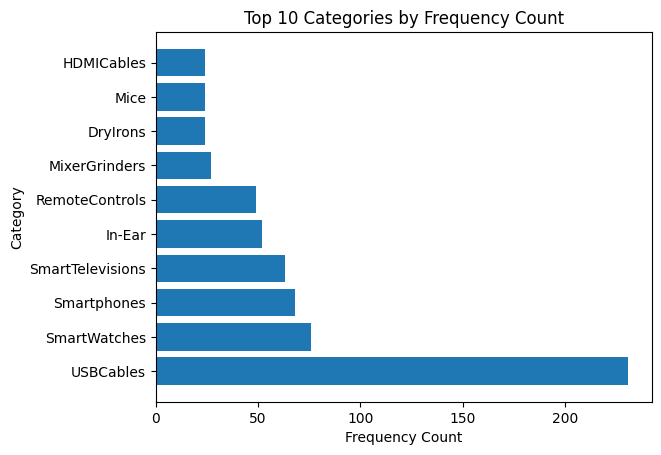

In [25]:

category_counts = df['category'].value_counts().sort_values(ascending = False)
top_10_categories = category_counts.head(10)

plt.barh(top_10_categories.index, top_10_categories.values)
plt.xlabel('Frequency Count')
plt.ylabel('Category')
plt.title('Top 10 Categories by Frequency Count')
plt.show()

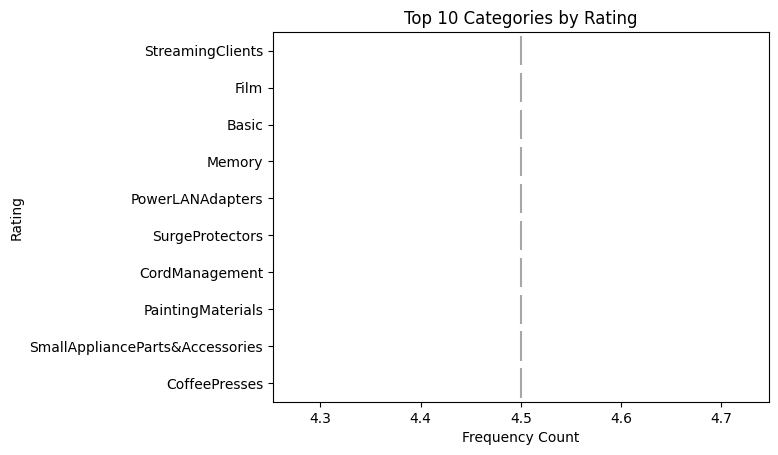

In [26]:
rating = df.groupby('category')['rating'].mean().sort_values(ascending = False).head(10).index
subset_dff = df[df['category'].isin(rating)]
sns.boxenplot(data = subset_dff,x='rating' ,y = 'category')
plt.xlabel('Frequency Count')
plt.ylabel('Rating')
plt.title('Top 10 Categories by Rating')
plt.show()

In [27]:
df.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'user_id', 'category',
       'subcategory', 'subcategory_1'],
      dtype='object')

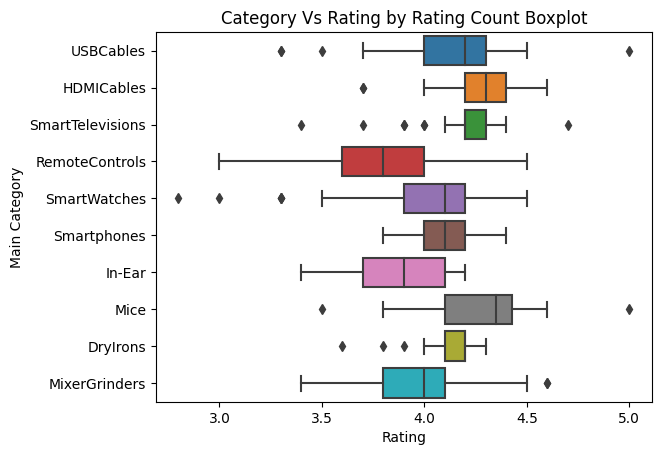

In [28]:
top_categories = df['category'].value_counts().head(10).index
subset_df = df[df['category'].isin(top_categories)]

sns.boxplot(data=subset_df, x='rating', y='category', orient = 'h')
plt.title("Category Vs Rating by Rating Count Boxplot")
plt.xlabel("Rating")
plt.ylabel("Main Category")
plt.show()

In [29]:
df.category.value_counts().head(10)

category
USBCables           231
SmartWatches         76
Smartphones          68
SmartTelevisions     63
In-Ear               52
RemoteControls       49
MixerGrinders        27
DryIrons             24
Mice                 24
HDMICables           24
Name: count, dtype: int64

C:\Users\athar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

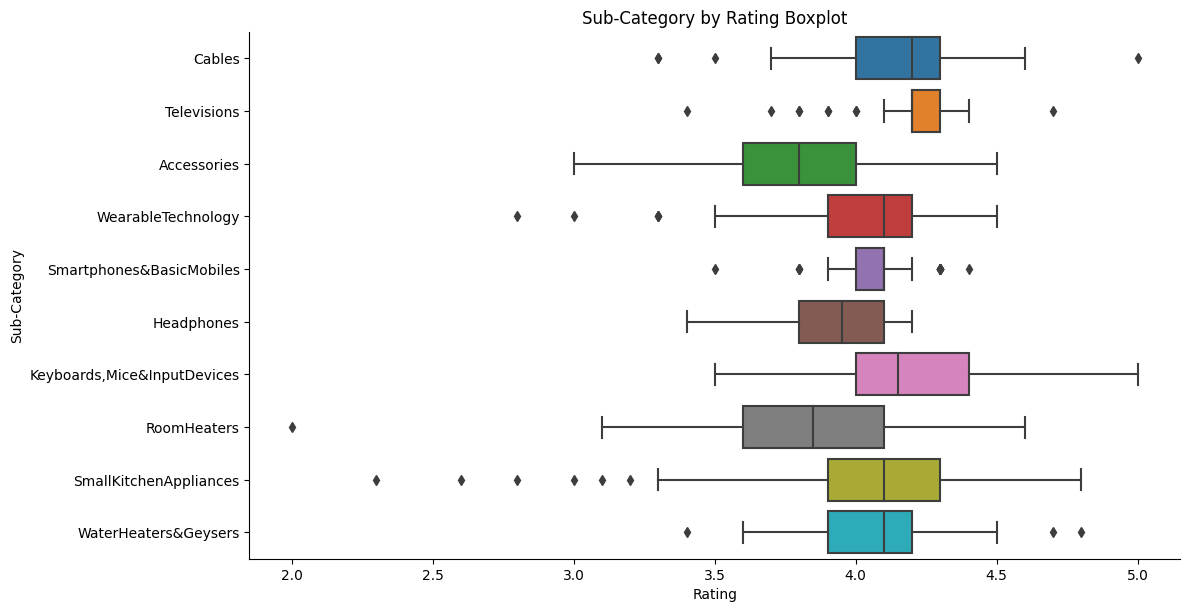

In [30]:
top_subcategory = df['subcategory'].value_counts().head(10).index
sub_cat_filtered = df[df['subcategory'].isin(top_subcategory)]

# Set up the figure and axis
plt.figure(figsize=(5, 3))

# Create a box plot using Seaborn's catplot
sns.catplot(data=sub_cat_filtered, x='rating', y='subcategory', kind='box', height=6, aspect=2)

# Set the title and labels
plt.title("Sub-Category by Rating Boxplot")
plt.xlabel("Rating")
plt.ylabel("Sub-Category")

# Show the plot
plt.show()

## Recommendation 


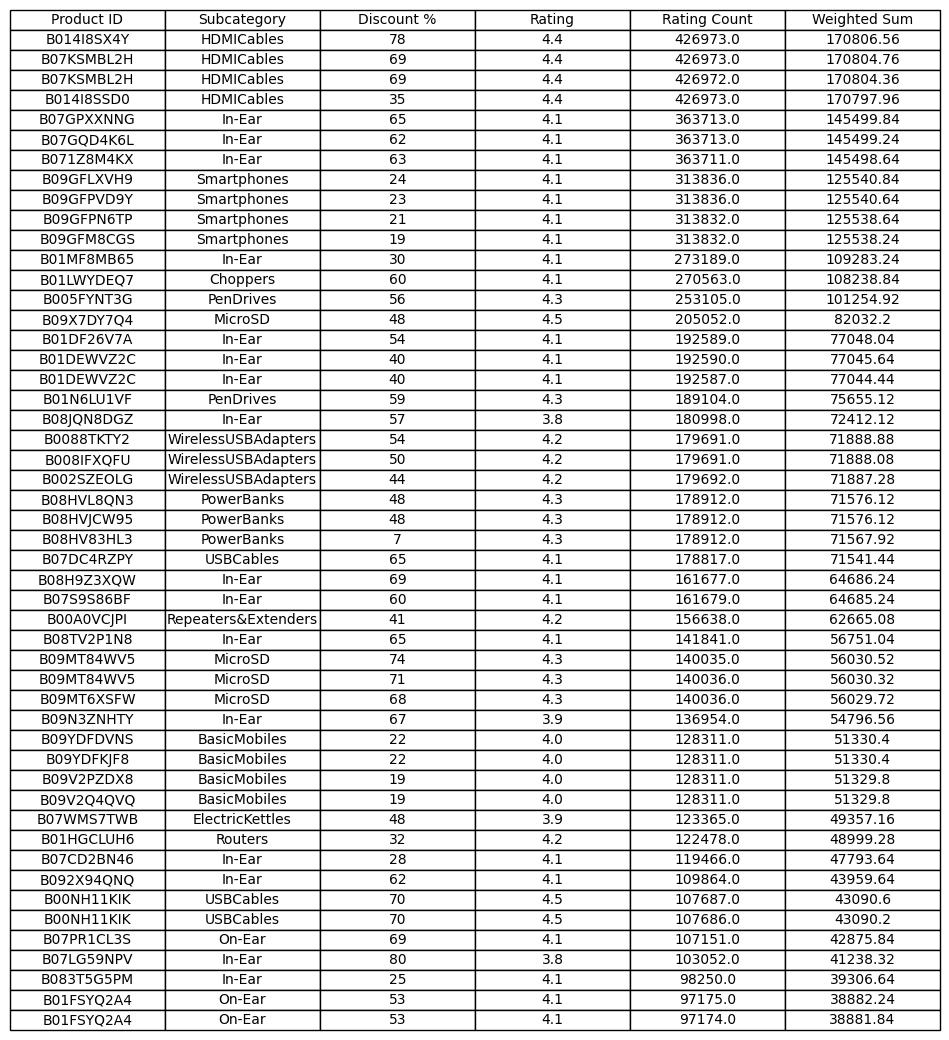

In [31]:
from prettytable import PrettyTable

# Load data from CSV
df = pd.read_csv('aamazon.csv')

# Convert 'DiscountRate' from percentage to float, handling non-numeric characters
numeric_cols = ['discount_percentage', 'rating']
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.str.rstrip('%')).apply(pd.to_numeric, errors='coerce')

# Convert 'rating_count' from comma-separated to numeric
df['rating_count'] = df['rating_count'].replace({',': ''}, regex=True).astype(float)

df.fillna(0, inplace=True)  # Replace NaN values with 0 or choose another default value

# Define weights for each feature
weight_rating = 0.4
weight_rating_count = 0.4
weight_discount = 0.2

for i in range(1, 4):
    column_name = f'subcategory_{i}'
    df[column_name] = df['category'].str.split("|").str[-i]

# Create a weighted sum column
df['WeightedSum'] = (
    weight_rating * df['rating'] +
    weight_rating_count * df['rating_count'] +
    weight_discount * df['discount_percentage']
)

# Round the 'WeightedSum' column to 2 decimal places
df['WeightedSum'] = df['WeightedSum'].round(2)

# Sort the DataFrame by the weighted sum in descending order
df = df.sort_values(by='WeightedSum', ascending=False)

# Display only the top 50 recommended products
top_50_df = df.head(50)

# Assuming top_50_df is a pandas DataFrame
table_data = [['Product ID', 'Subcategory', 'Discount %', 'Rating', 'Rating Count', 'Weighted Sum']]

# Populate the table data
for _, row in top_50_df.iterrows():
    table_data.append([row['product_id'], row['subcategory_1'], row['discount_percentage'], row['rating'], row['rating_count'], row['WeightedSum']])

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')  # Turn off the axis

# Create the table
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()


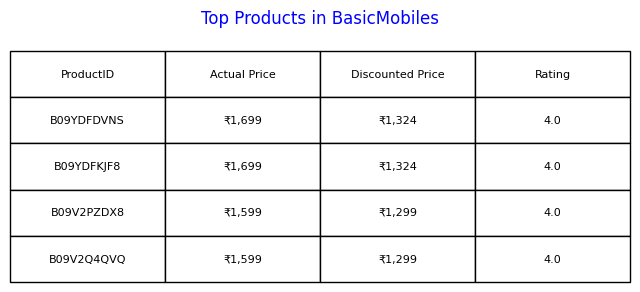

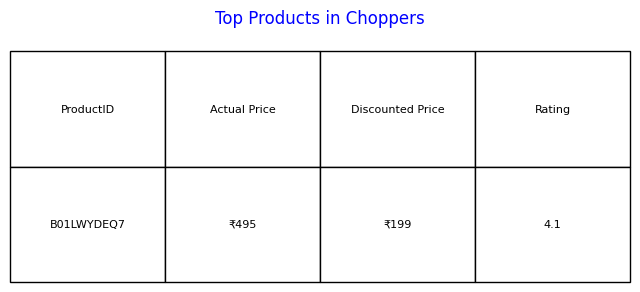

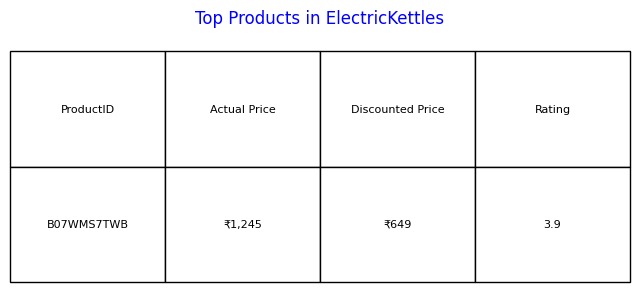

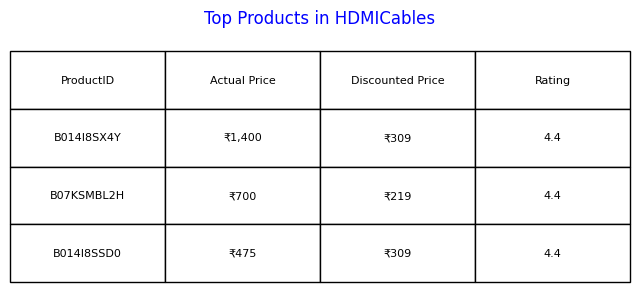

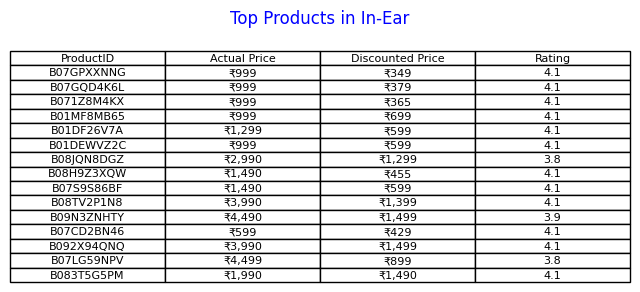

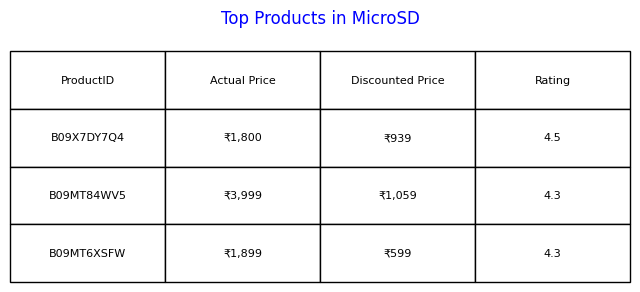

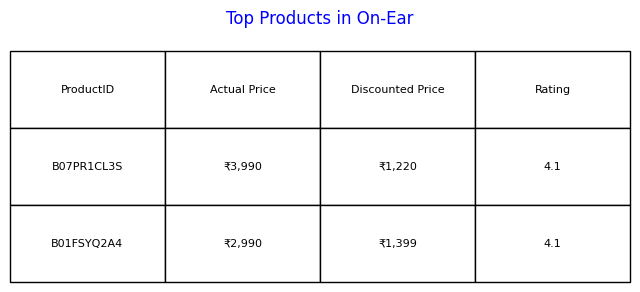

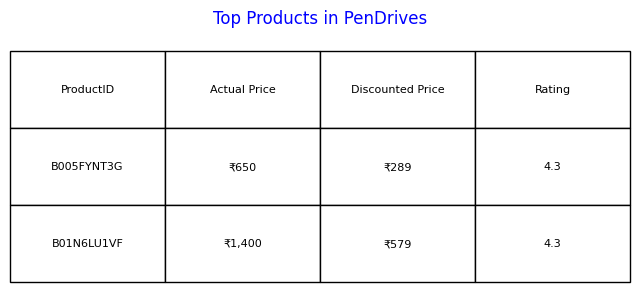

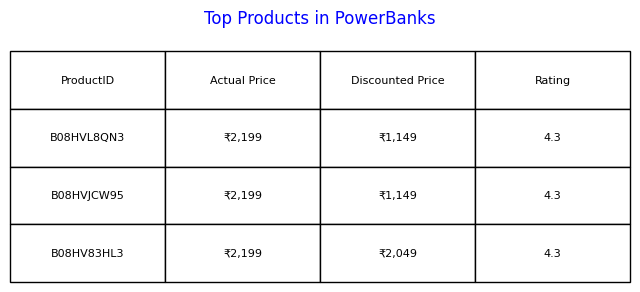

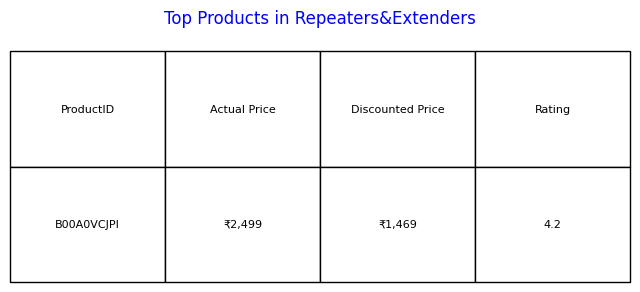

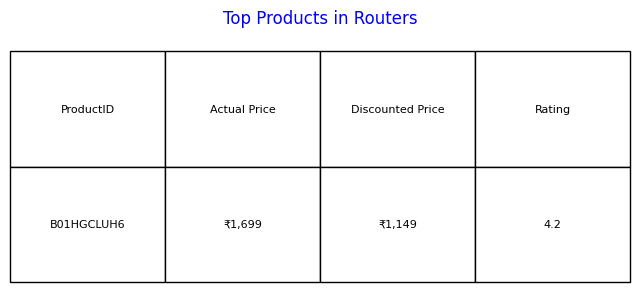

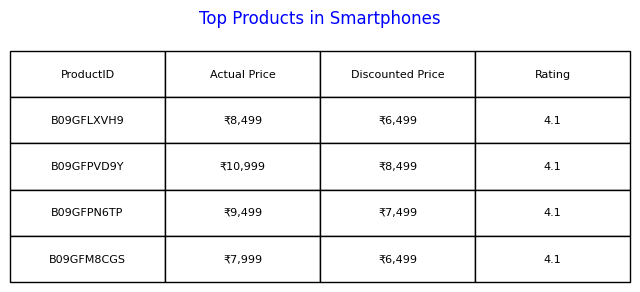

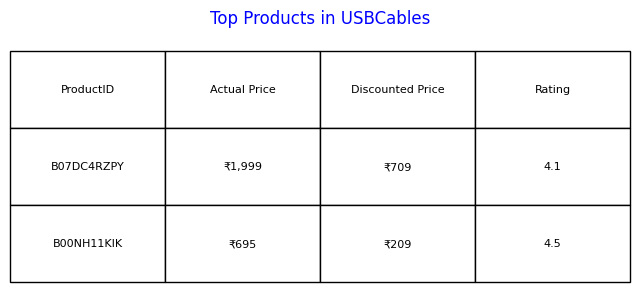

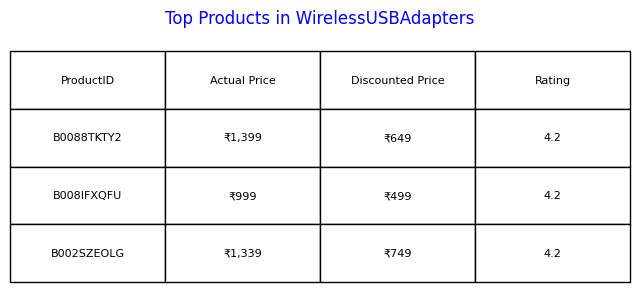

In [32]:
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Group by 'Subcategory' and iterate over groups
for subcategory, group in top_50_df.groupby('subcategory_1'):
    # Drop duplicates based on 'ProductID'
    group = group.drop_duplicates(subset='product_id')

    # Sort the DataFrame by 'Weighted_Average' in descending order
    sorted_group = group.sort_values(by='WeightedSum', ascending=False)

    # Create a list to store table data
    table_data = [['ProductID', 'Actual Price', 'Discounted Price', 'Rating']]

    # Populate the table data
    for _, row in sorted_group.iterrows():
        table_data.append([row['product_id'], row['actual_price'], row['discounted_price'], row['rating']])

    # Create a Matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.axis('off')  # Turn off the axis

    # Create the table using Matplotlib's table function
    table = ax.table(cellText=table_data, loc='center', colLabels=None, cellLoc='center', bbox=[0, 0, 1, 1])

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    # Add a title for the current subcategory
    ax.set_title(f"Top Products in {subcategory}", fontsize=12, color='blue',  pad=20)

    # Show the table
    plt.show()


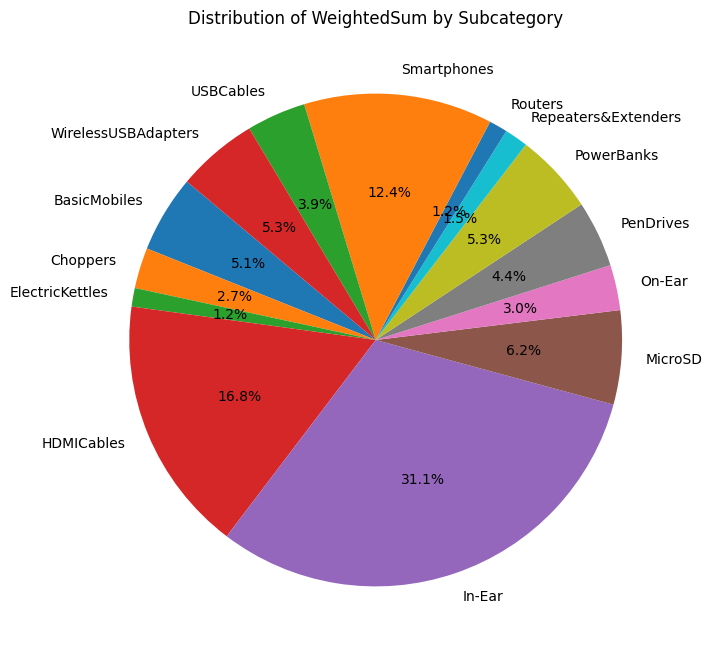

In [33]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 8))

# Group by subcategory and calculate the sum of WeightedSum
subcategory_sum = top_50_df.groupby('subcategory_1')['WeightedSum'].sum()

# Plot the pie chart
plt.pie(subcategory_sum, labels=subcategory_sum.index, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title("Distribution of WeightedSum by Subcategory")

# Show the plot
plt.show()

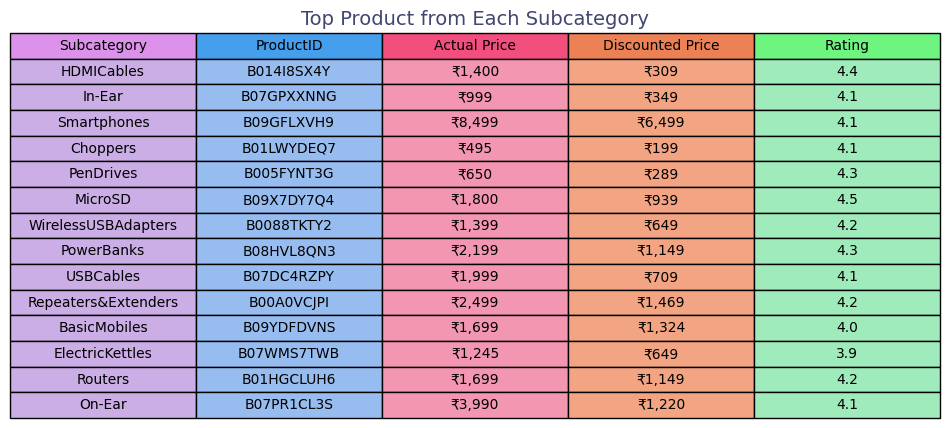

In [34]:
# Group by 'Subcategory' and select the top 1 product based on the weighted average
top_products = top_50_df.sort_values(by='WeightedSum', ascending=False).groupby('subcategory_1').head(1)

# Plotting using Matplotlib with styling
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')  # Turn off axis for better appearance

# Create a table and add it to the plot with custom colors and styling
table_data = []
for _, row in top_products.iterrows():
    table_data.append([row['subcategory_1'], row['product_id'], row['actual_price'], row['discounted_price'], row['rating']])

table = ax.table(cellText=table_data,
                 colLabels=['Subcategory', 'ProductID', 'Actual Price', 'Discounted Price', 'Rating'],
                 loc='center',
                 colColours=['#dc91eb', '#459fed', '#f24e7e', '#eb8154', '#6ef580'],  # Use a gradient of coral for column headers
                 cellColours=[['#cbaee6', '#97bdf0', '#f296b1', '#f2a483', '#a0ebbc']]*len(top_products),  # Use the same gradient for cells
                 cellLoc='center',
                 bbox=[0, 0, 1, 1])

# Styling adjustments
table.auto_set_font_size(True)
table.set_fontsize(10)

plt.title('Top Product from Each Subcategory', fontsize=14, color='#40466e')  
plt.show()
